#### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
import scipy.stats as stats
import statsmodels as sm
%matplotlib inline

import sklearn as sk

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True

In [58]:
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.model_selection import train_test_split,learning_curve

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

#### Dataset

In [5]:
cust_demo = pd.read_excel('C://Users//sandisk//Downloads//ML using Python//Case Studies//11. Capstone Case Study - Predict Cred Card Consumption//CustomerDemographics.xlsx//')

In [6]:
cust_behav = pd.read_excel('C://Users//sandisk//Downloads//ML using Python//Case Studies//11. Capstone Case Study - Predict Cred Card Consumption//CustomerBehaviorData.xlsx//')

In [7]:
cred_consump = pd.read_excel('C://Users//sandisk//Downloads//ML using Python//Case Studies//11. Capstone Case Study - Predict Cred Card Consumption//CreditConsumptionData.xlsx//')

In [8]:
cust_demo.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction'],
      dtype='object')

In [9]:
cust_behav.columns

Index(['ID', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active'],
      dtype='object')

In [10]:
cred_consump.columns

Index(['ID', 'cc_cons'], dtype='object')

#### Merge the Dataset

In [11]:
demo_behav = pd.merge(cust_demo,cust_behav, on = 'ID' )

In [12]:
bank_cust = pd.merge(demo_behav,cred_consump, on = 'ID')

In [13]:
bank_cust.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


In [14]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
 10  cc_cons_apr                   20000 non-null  float64
 11  dc_cons_apr                   20000 non-null  float64
 12  cc_cons_may                   19999 non-null  float64
 13  d

#### Data Cleaning

In [15]:
columns_to_drop = [
    'ID', 
    'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
    'cc_count_apr', 'cc_count_may', 'cc_count_jun',
    'dc_count_apr', 'dc_count_may', 'dc_count_jun',
    'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
    'debit_amount_may', 'credit_amount_may', 'debit_count_may', 'credit_count_may', 'max_credit_amount_may',
    'debit_amount_jun', 'credit_amount_jun', 'debit_count_jun', 'credit_count_jun', 'max_credit_amount_jun','loan_enq']

In [16]:
bank_cust.drop(columns = columns_to_drop, inplace = True)

In [17]:
conti_vars = bank_cust.select_dtypes(['float64','int64'])
cat_vars = bank_cust.select_dtypes('object')

In [18]:
conti_vars.head()

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,emi_active,cc_cons
0,63,30.1,10,628.0,1,5.0,519000,1,1,1.0,1,13659.00,14000.00,80000.0,6885.0,2646.72,NaN
1,36,14.4,10,656.0,0,12.0,402000,1,1,1.0,1,942327.70,172131.00,28912.0,553.0,5469.79,NaN
2,28,4.8,10,314.0,1,13.0,114000,1,1,1.0,1,70310.60,208652.00,1036.0,1089.0,7207.85,NaN
3,32,9.6,2,614.0,1,19.0,298000,1,1,1.0,1,101891.25,100934.00,678.0,1931.0,591.34,NaN
4,32,12.0,7,750.0,1,18.0,381000,1,1,1.0,1,27316.50,90829.65,12000.0,10455.0,2621.39,NaN


In [19]:
cat_vars.head()

,account_type,gender,Income
0,current,M,MEDIUM
1,current,M,MEDIUM
2,current,F,MEDIUM
3,current,M,MEDIUM
4,current,M,HIGH


#### Summary of Continuous Variables

In [20]:
# Create Data audit Report for continuous variables

def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [21]:
conti_vars.apply(continuous_var_summary).T.round(1).sort_values('NMISS',ascending=False).head(10)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
cc_cons,15000.0,5000.0,8.273659e+08,55157.7,13364.0,97671.0,9.539619e+09,0.0,272.0,1290.9,2633.6,6768.0,13364.0,20105.8,219688.7,309852.0,395290.6,408382.0
Avg_days_between_transaction,19997.0,3.0,2.208620e+05,11.0,11.0,5.5,3.000000e+01,2.0,2.0,2.0,3.0,6.0,11.0,16.0,19.0,20.0,20.0,20.0
investment_3,19998.0,2.0,8.920239e+08,44605.7,13873.0,88505.0,7.833130e+09,462.0,505.0,583.0,768.0,2214.0,13873.0,48950.0,126001.0,230000.0,610000.0,610000.0
emi_active,19999.0,1.0,3.079620e+08,15398.9,3934.7,120254.1,1.446104e+10,0.0,26.7,198.0,461.1,1545.9,3934.7,9376.4,19715.3,36148.1,155041.2,7447125.1
region_code,19999.0,1.0,1.197859e+07,599.0,623.0,220.1,4.844630e+04,123.0,233.0,249.0,269.0,424.0,623.0,799.0,883.0,937.0,968.0,974.0
personal_loan_closed,19999.0,1.0,1.999900e+04,1.0,1.0,0.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
vehicle_loan_closed,20000.0,0.0,2.000000e+04,1.0,1.0,0.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
investment_4,20000.0,0.0,6.990880e+07,3495.4,2351.0,7369.5,5.430970e+07,-12179.0,-7652.0,-6281.4,-5942.0,0.0,2351.0,6885.0,12415.0,19765.0,26601.0,35346.0
investment_2,20000.0,0.0,4.659041e+09,232952.0,110135.9,407520.2,1.660727e+11,3.0,6.0,2436.9,11772.8,38928.0,110135.9,245000.0,482147.0,971144.5,1752254.0,5000000.0
investment_1,20000.0,0.0,1.181796e+10,590898.1,44331.8,2937386.5,8.628240e+12,0.3,12.2,204.0,690.0,6030.6,44331.8,161704.0,747610.0,1910215.0,12850544.4,65977430.0


#### Summary of Categorical Variables

In [22]:
# Create Data audit Report for categorical variables

def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [23]:
cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
account_type,19999,1,current,16925,84.63
gender,19999,1,M,17287,86.44
Income,19999,1,MEDIUM,12774,63.87


In [24]:
bank_cust.dropna(subset = 'cc_cons', inplace = True)

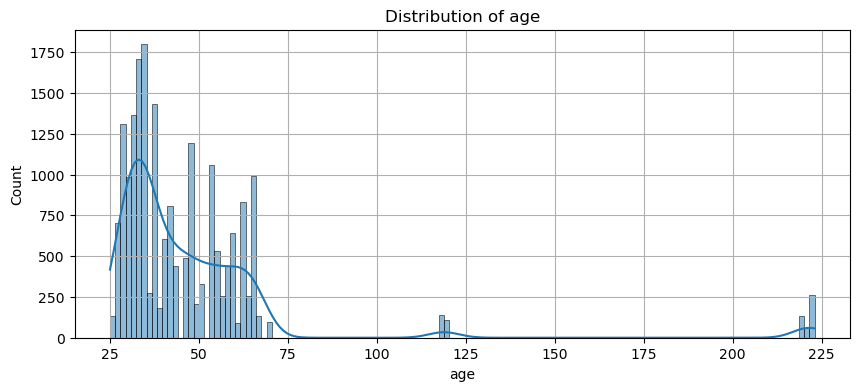

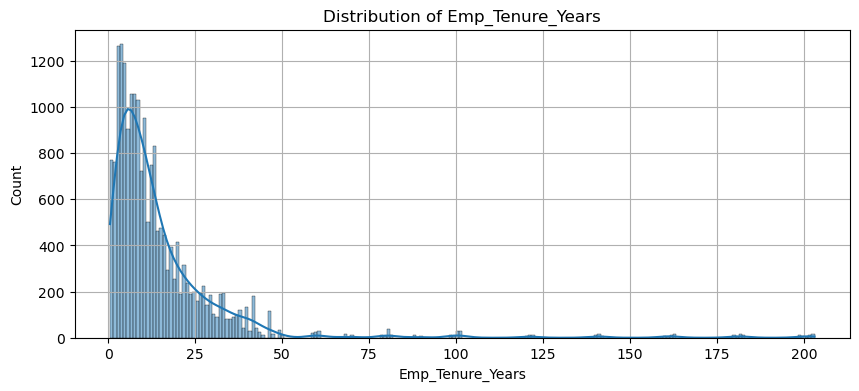

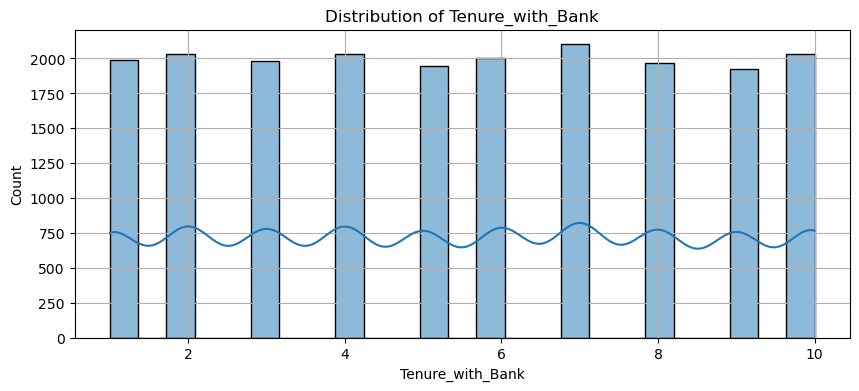

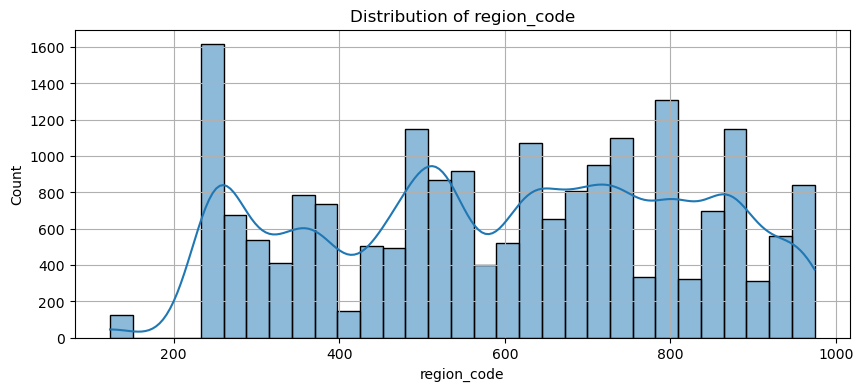

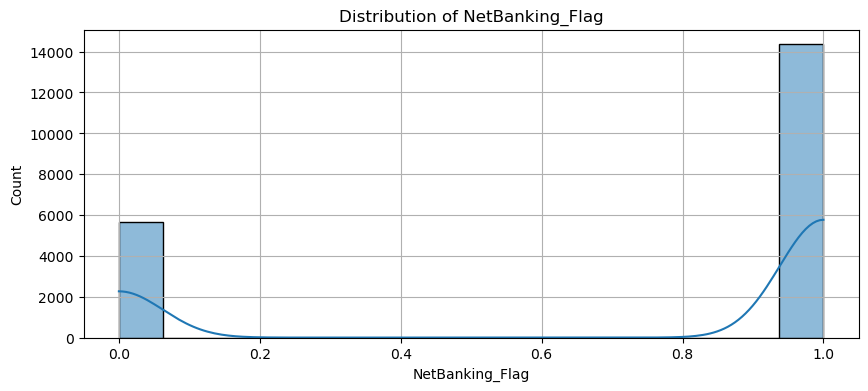

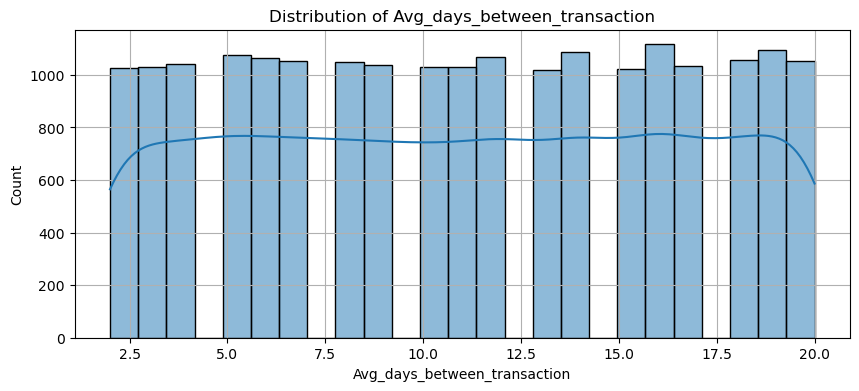

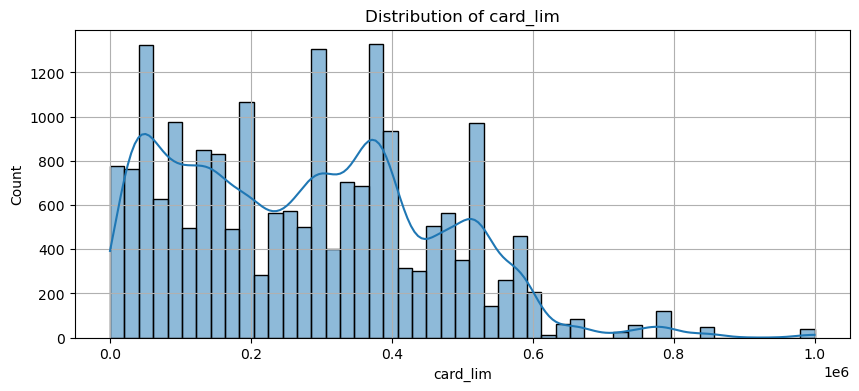

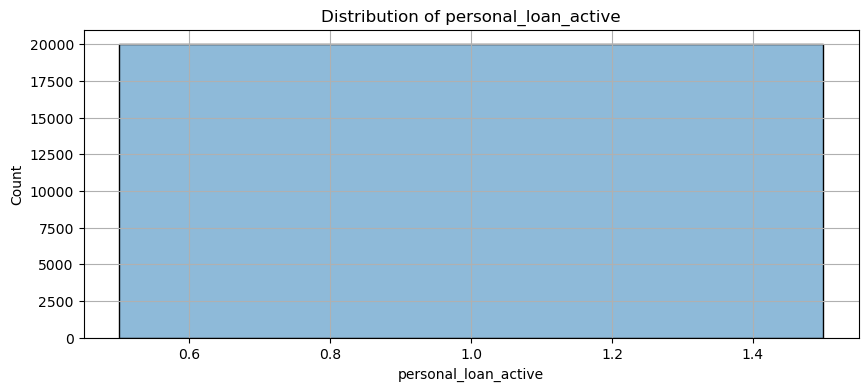

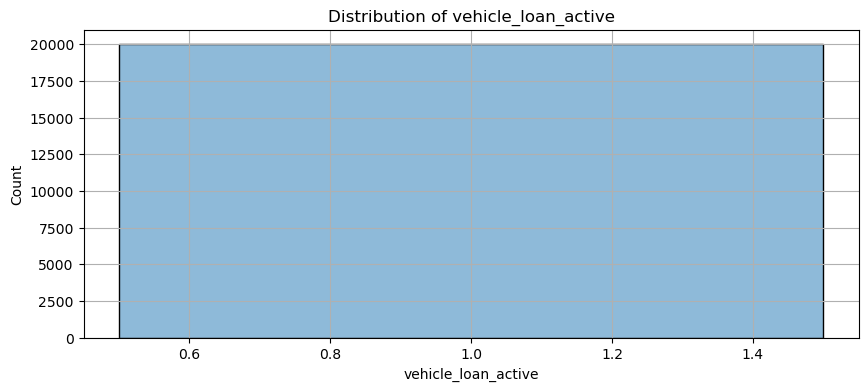

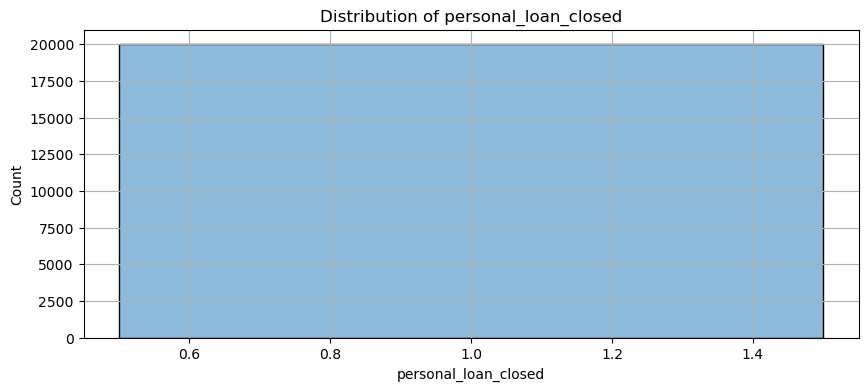

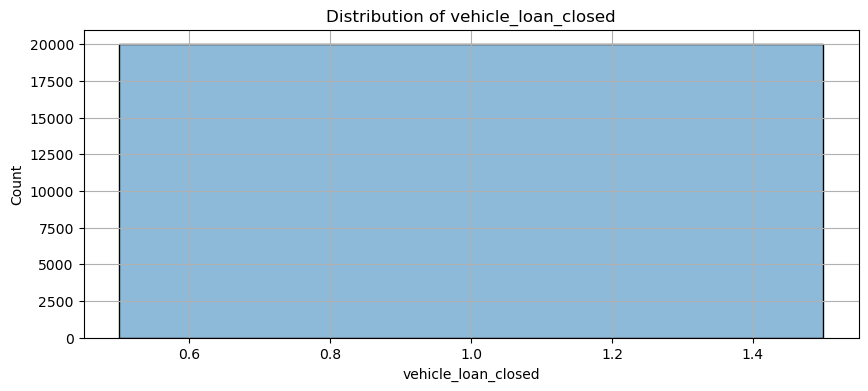

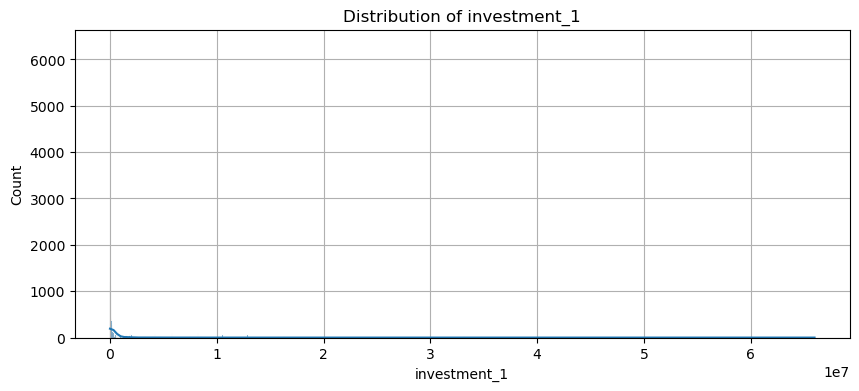

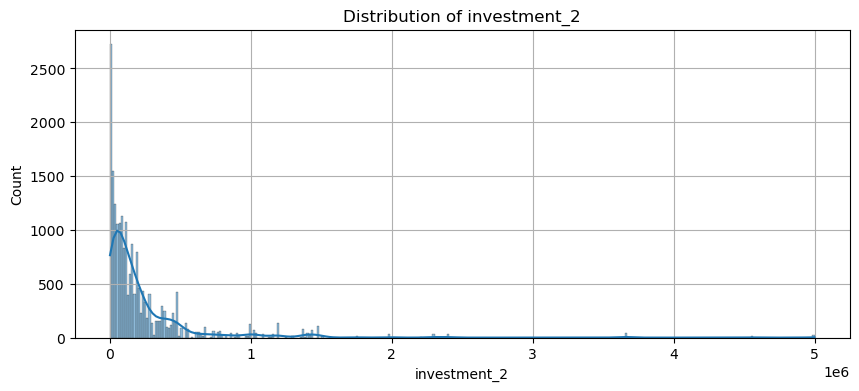

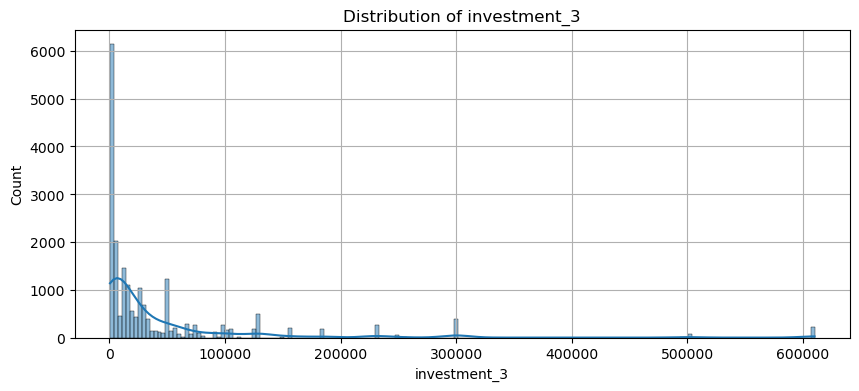

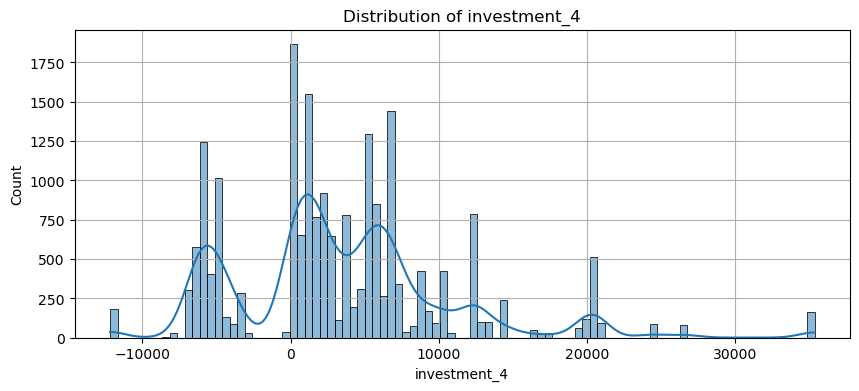

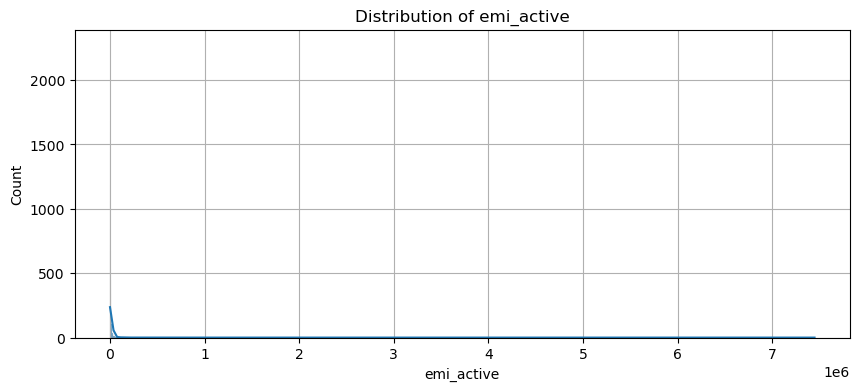

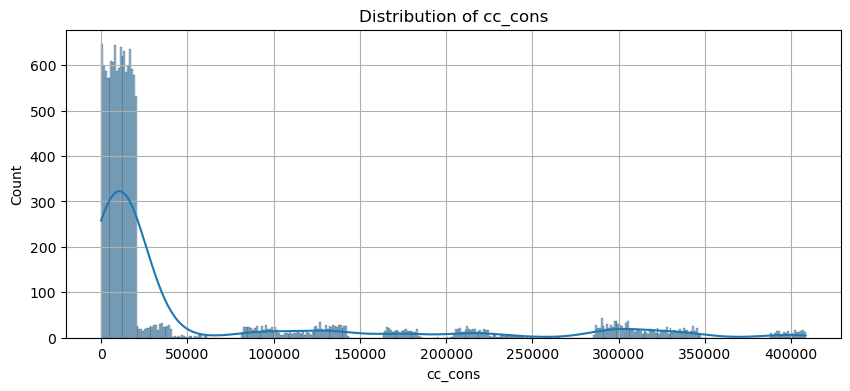

In [25]:
#Plot distribution of continuous variables

for var in conti_vars:
    plt.figure(figsize=(10, 4))
    sns.histplot(conti_vars[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

In [26]:
#Plot distribution of Categorical Variables

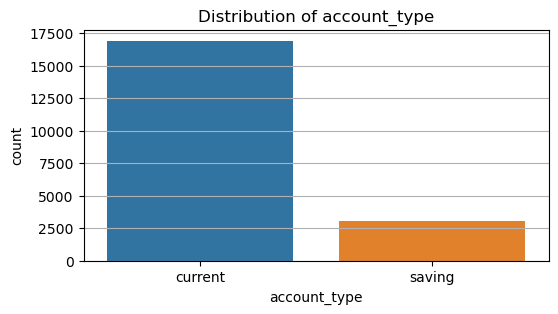

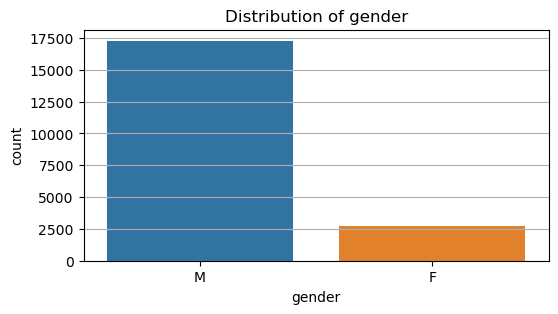

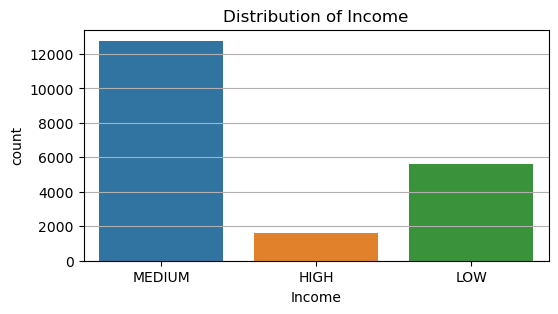

In [27]:
for var in cat_vars:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=var, data=cat_vars)
    plt.title(f'Distribution of {var}')
    plt.show()

In [28]:
bank_cust.dropna(inplace = True)

In [29]:
bank_cust.shape

(14997, 20)

#### Outliers Treatment

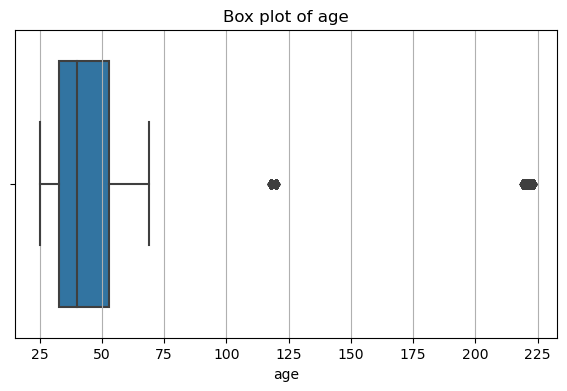

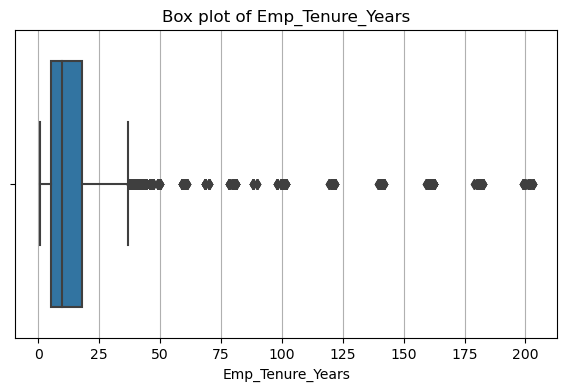

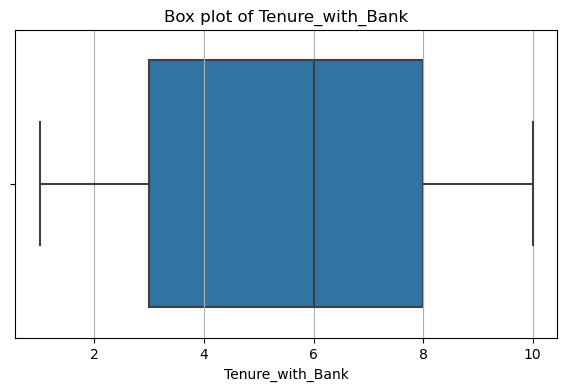

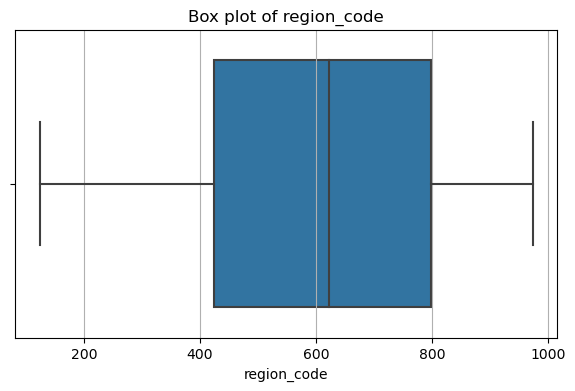

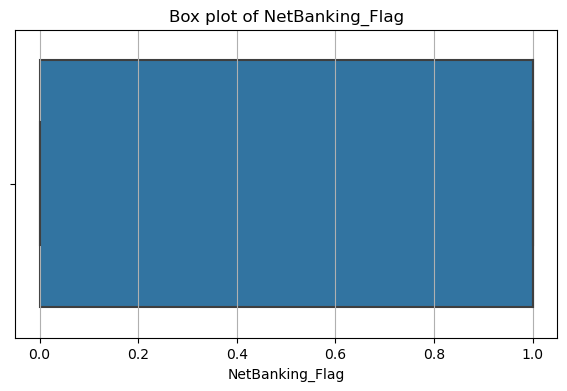

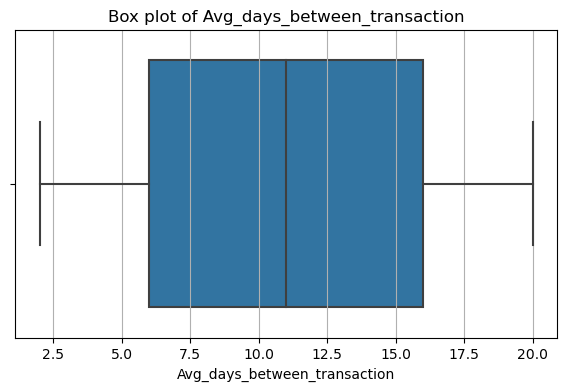

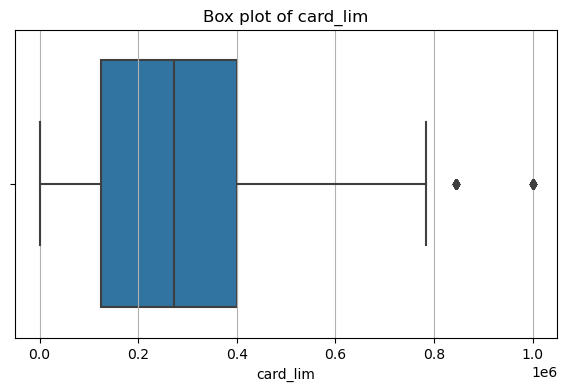

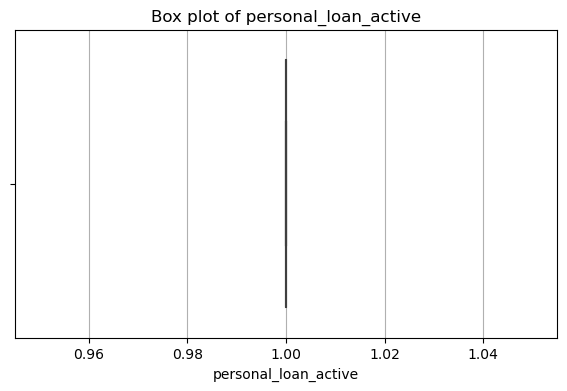

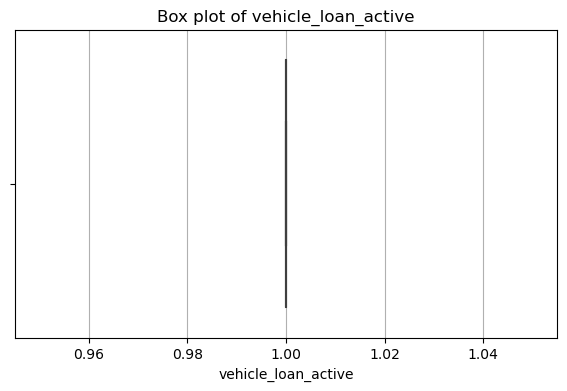

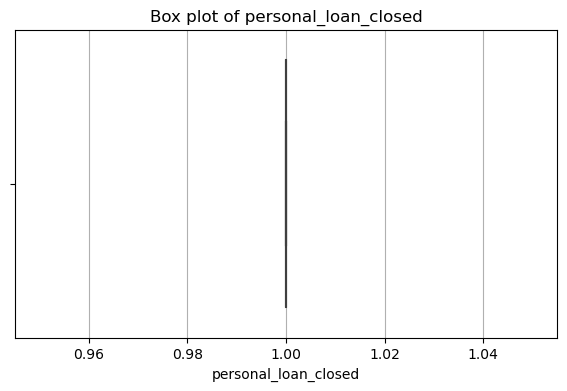

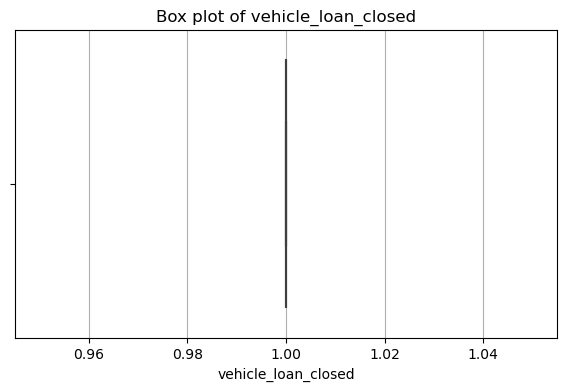

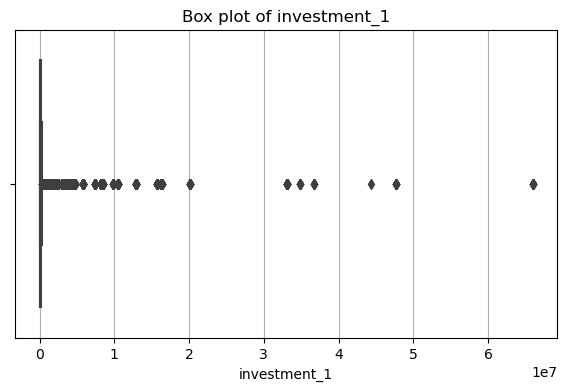

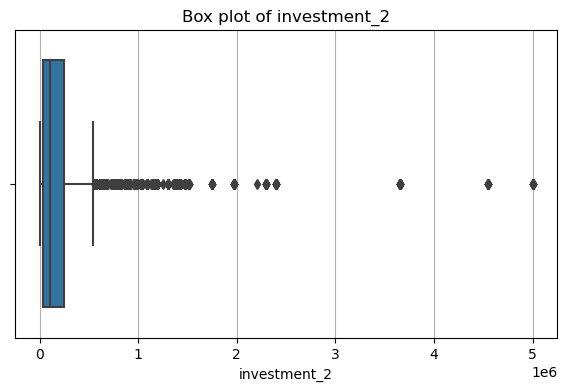

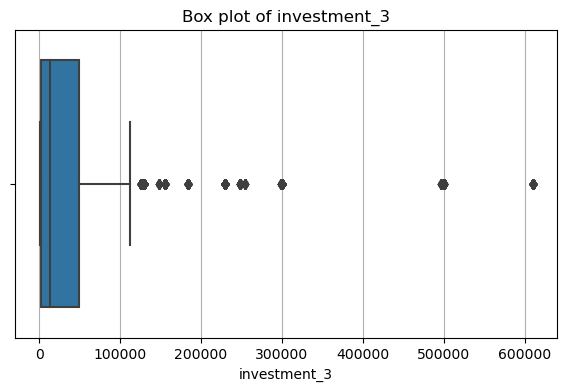

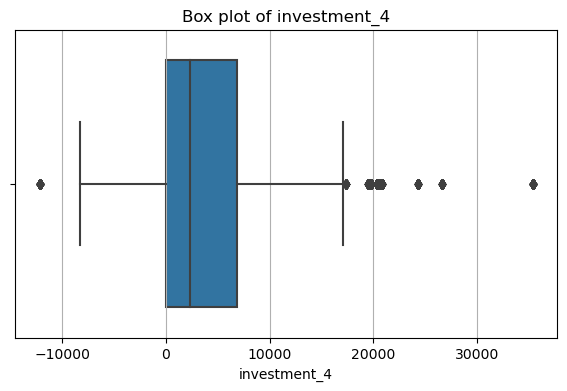

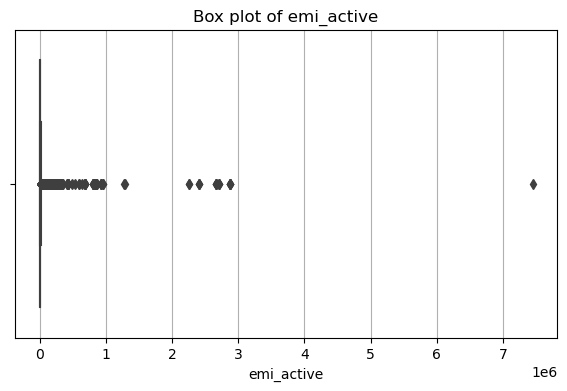

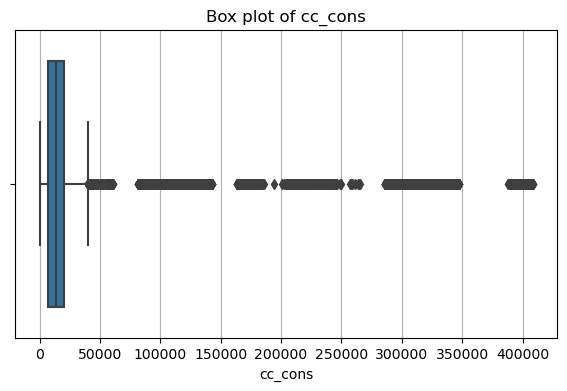

In [30]:
for var in conti_vars:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=bank_cust[var])
    plt.title(f'Box plot of {var}')
    plt.show()

In [31]:
# Cap outliers using IQR method

for var in conti_vars:
    Q1 = bank_cust[var].quantile(0.25)
    Q3 = bank_cust[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bank_cust[var] = np.where(bank_cust[var] < lower_bound, lower_bound, bank_cust[var])
    bank_cust[var] = np.where(bank_cust[var] > upper_bound, upper_bound, bank_cust[var])


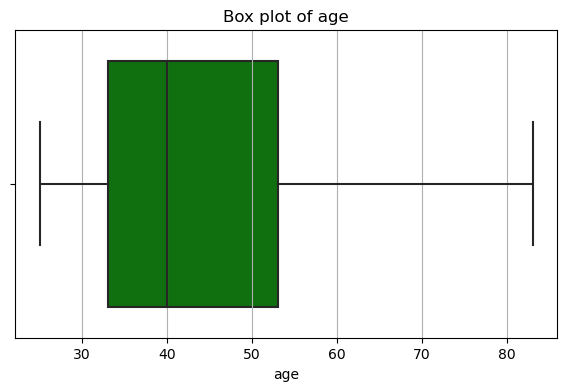

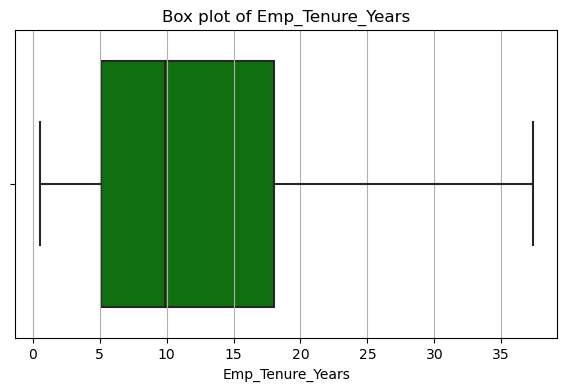

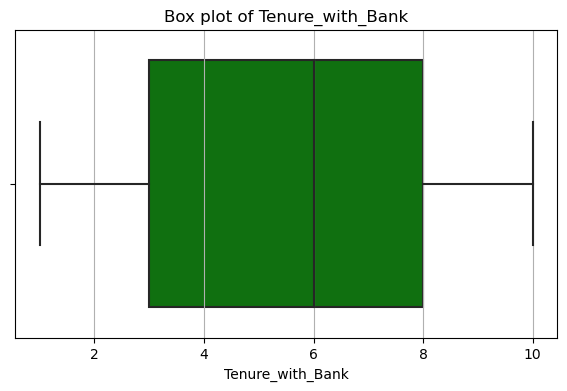

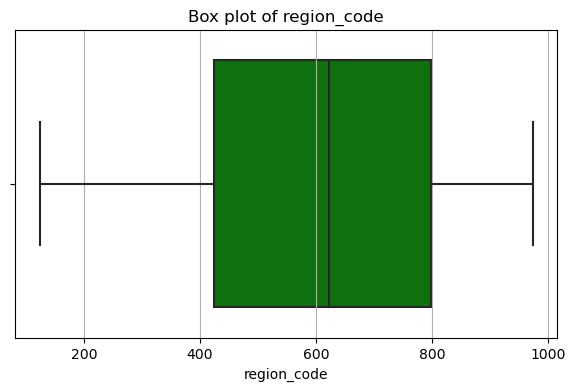

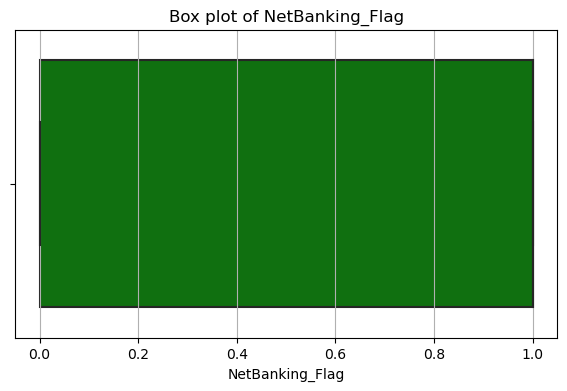

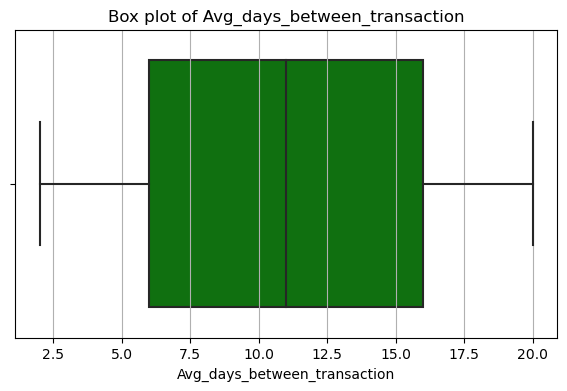

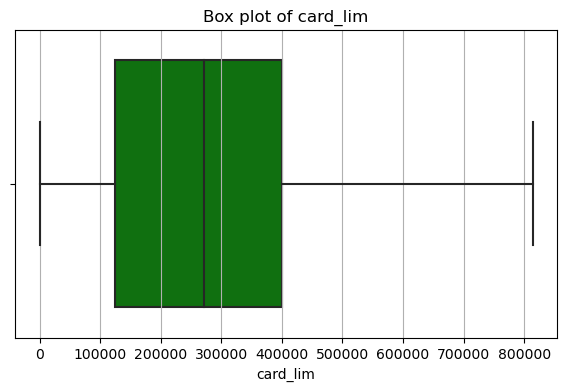

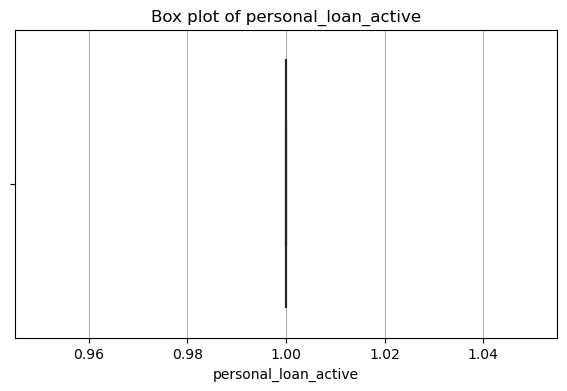

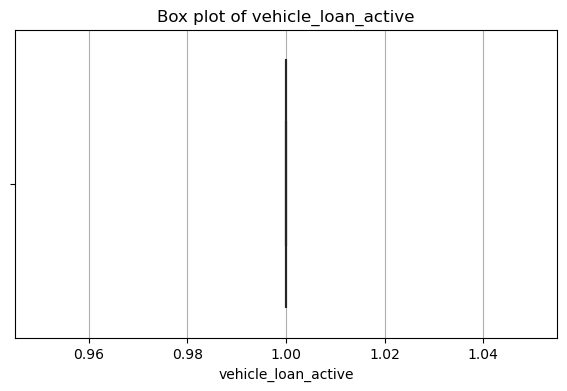

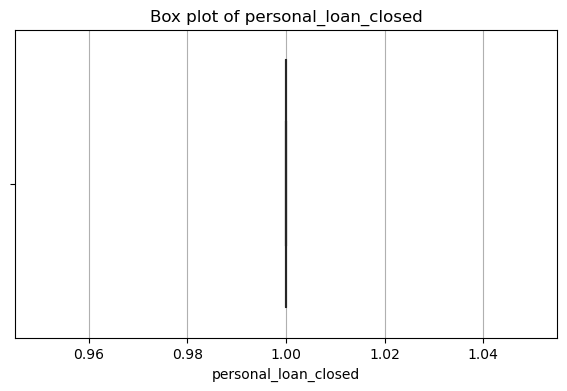

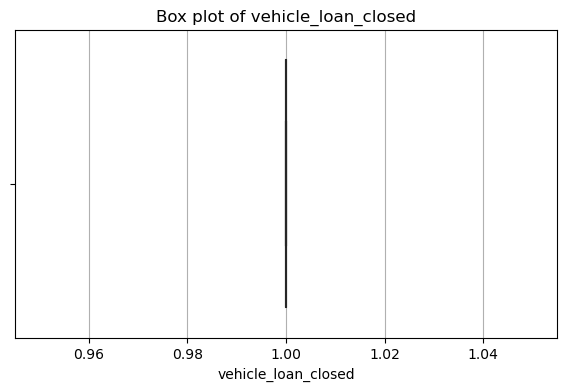

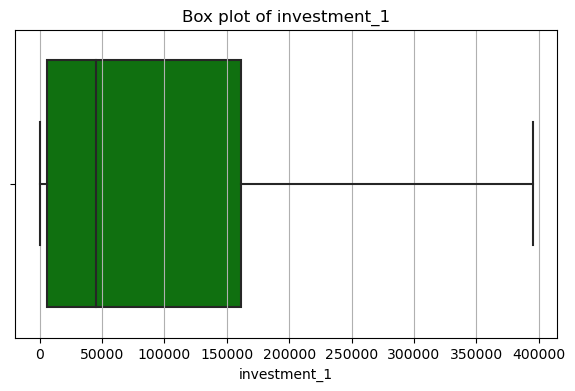

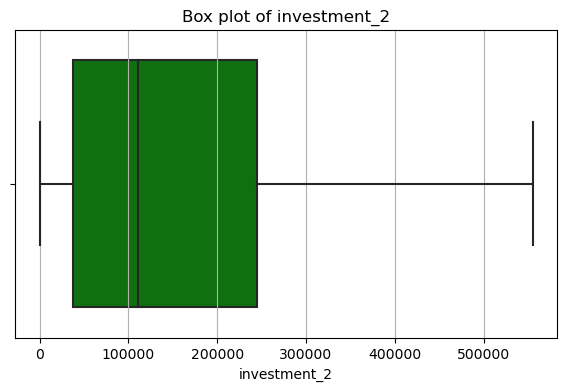

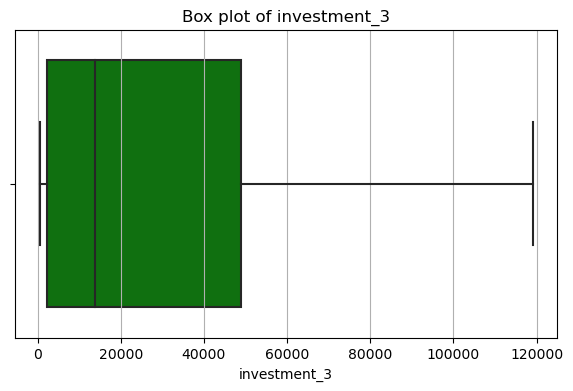

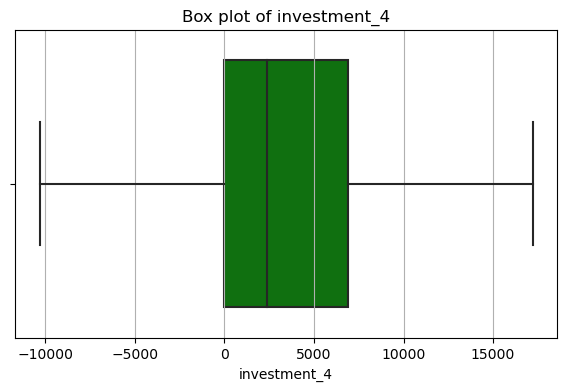

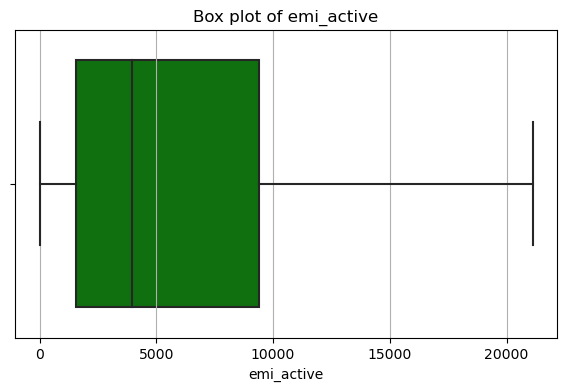

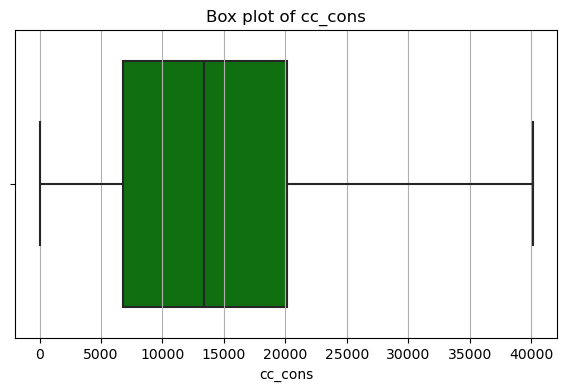

In [32]:
for var in conti_vars:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=bank_cust[var], color = 'green')
    plt.title(f'Box plot of {var}')
    plt.show()

In [33]:
bank_cust.isna().sum()

account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            0
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
emi_active                      0
cc_cons                         0
dtype: int64

In [34]:
bank_cust.shape

(14997, 20)

#### Encode the Categorical Variables

In [35]:
cate_cols = bank_cust.select_dtypes(include = object)
for col in cate_cols.columns:
    unique_values = cate_cols[col].unique()
    print(col,unique_values)

account_type ['current' 'saving']
gender ['M' 'F']
Income ['MEDIUM' 'HIGH' 'LOW']


In [36]:
# Function to apply label encoding

def label_encode(data, columns):
    le = LabelEncoder()
    for col in columns:
        data[col] = le.fit_transform(data[col])
    return data

# Apply Label Encoding
bank_cust = label_encode(bank_cust, cate_cols)

In [37]:
bank_cust.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,emi_active,cc_cons
111,0,1,35.0,2,15.0,1.0,708.0,0.0,17.0,430000.0,1.0,1.0,1.0,1.0,593.20,1244.14,787.0,6885.0,1674.09,20014.0
112,0,1,35.0,0,15.0,6.0,123.0,0.0,14.0,127500.0,1.0,1.0,1.0,1.0,213557.15,172678.56,90525.0,1500.0,13043.34,10173.0
113,0,1,55.0,2,24.5,1.0,802.0,1.0,3.0,199999.0,1.0,1.0,1.0,1.0,165907.57,470000.00,25524.0,3735.0,21115.69,16095.0
114,0,0,29.0,2,4.5,6.0,867.0,1.0,4.0,155000.0,1.0,1.0,1.0,1.0,81872.65,223379.40,48500.0,-4679.0,3544.33,7707.0
115,0,1,34.0,2,12.6,4.0,802.0,1.0,7.0,297000.0,1.0,1.0,1.0,1.0,568.80,385000.00,119054.0,6916.0,12780.44,40110.5


#### Correlation Matrix

In [38]:
corrm = bank_cust.corr()
corrm

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,emi_active,cc_cons
account_type,1.000000,-0.001454,-0.005914,0.000889,-0.004197,0.012972,-0.009908,-0.005598,0.000593,-0.004751,NaN,NaN,NaN,NaN,-0.012455,-0.000348,0.008460,-0.003000,0.005882,-0.001320
gender,-0.001454,1.000000,0.000344,0.025597,-0.002610,0.015653,0.006650,0.011632,0.000983,-0.007289,NaN,NaN,NaN,NaN,0.011165,-0.001668,-0.003496,0.006085,-0.011061,0.004069
age,-0.005914,0.000344,1.000000,-0.006319,0.725482,0.000664,0.005290,0.012390,0.003130,0.006689,NaN,NaN,NaN,NaN,-0.000041,-0.001137,0.009135,0.007403,0.007044,-0.009690
Income,0.000889,0.025597,-0.006319,1.000000,-0.012753,0.001452,-0.011740,-0.012764,-0.002494,-0.000133,NaN,NaN,NaN,NaN,-0.003067,0.013391,0.001962,0.007758,0.003915,-0.007742
Emp_Tenure_Years,-0.004197,-0.002610,0.725482,-0.012753,1.000000,-0.005871,-0.000055,0.001172,0.006133,0.006837,NaN,NaN,NaN,NaN,-0.000474,-0.008231,0.002397,-0.001238,0.004483,-0.012239
Tenure_with_Bank,0.012972,0.015653,0.000664,0.001452,-0.005871,1.000000,-0.003706,-0.005873,0.009469,0.007054,NaN,NaN,NaN,NaN,-0.008346,-0.006911,0.000363,-0.020516,-0.020706,0.005070
region_code,-0.009908,0.006650,0.005290,-0.011740,-0.000055,-0.003706,1.000000,0.006883,-0.017372,-0.000488,NaN,NaN,NaN,NaN,-0.007297,0.002225,0.007178,-0.003148,0.014881,-0.008288
NetBanking_Flag,-0.005598,0.011632,0.012390,-0.012764,0.001172,-0.005873,0.006883,1.000000,0.009067,-0.006393,NaN,NaN,NaN,NaN,0.001270,0.003917,-0.006751,-0.000958,-0.006493,0.001265
Avg_days_between_transaction,0.000593,0.000983,0.003130,-0.002494,0.006133,0.009469,-0.017372,0.009067,1.000000,0.007909,NaN,NaN,NaN,NaN,-0.003383,-0.002737,0.010868,0.003836,-0.002428,-0.006622
card_lim,-0.004751,-0.007289,0.006689,-0.000133,0.006837,0.007054,-0.000488,-0.006393,0.007909,1.000000,NaN,NaN,NaN,NaN,-0.003923,-0.013282,-0.002269,0.002824,-0.013339,-0.003656


### MODEL BUILDING

#### Split the data for model building

In [39]:
#Step1: divide the data into training and testing and separate out Y and X variables

train,test=train_test_split(bank_cust,test_size=0.3,random_state=56789)


In [40]:
test.head(10)

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,emi_active,cc_cons
6723,0,0,66.0,2,27.6,1.0,626.0,1.0,6.0,143000.0,1.0,1.0,1.0,1.0,115818.74,22400.00,5591.0,6916.00000,3882.64,40110.5
8846,0,1,34.0,2,9.8,9.0,974.0,0.0,11.0,17000.0,1.0,1.0,1.0,1.0,28827.73,16000.00,119054.0,-5942.00000,21115.69,40110.5
1135,0,1,29.0,1,2.7,10.0,858.0,1.0,12.0,27000.0,1.0,1.0,1.0,1.0,3549.85,356899.37,73217.0,1014.00000,1619.33,15614.0
8385,0,1,34.0,2,9.8,6.0,928.0,0.0,6.0,198000.0,1.0,1.0,1.0,1.0,115.45,170989.00,3000.0,6916.00000,1692.32,8399.0
12857,1,1,33.0,2,7.8,1.0,537.0,1.0,19.0,400000.0,1.0,1.0,1.0,1.0,395110.00,24000.00,2019.0,6885.00000,383.26,12239.0
11408,0,0,30.0,2,9.0,3.0,325.0,1.0,18.0,293000.0,1.0,1.0,1.0,1.0,8758.20,180000.00,2644.0,10210.00000,1036.67,15268.0
9794,0,1,53.0,0,23.1,7.0,486.0,1.0,10.0,326000.0,1.0,1.0,1.0,1.0,12328.75,210651.40,33774.0,6885.00000,4583.32,14243.0
12453,0,1,35.0,2,13.5,2.0,354.0,1.0,15.0,47000.0,1.0,1.0,1.0,1.0,1112.40,234459.40,3975.0,9415.00000,706.24,8024.0
9449,1,1,27.0,2,4.2,7.0,968.0,0.0,19.0,202500.0,1.0,1.0,1.0,1.0,41883.60,43397.00,12000.0,-4612.00977,11635.36,14039.0
14561,0,0,31.0,2,5.5,7.0,233.0,0.0,3.0,402000.0,1.0,1.0,1.0,1.0,10006.20,95081.00,56305.0,3735.00000,11084.29,2066.0


In [41]:
# verify the no of obs in training and testing after split

print('No of obs in training: ', len(train), ' | ', 'No of obs in testing: ', len(test))

No of obs in training:  10497  |  No of obs in testing:  4500


In [42]:
train.columns

Index(['account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'emi_active', 'cc_cons'],
      dtype='object')

In [43]:
all_columns = "+".join(train.columns.difference( ['cc_cons'] ))

print(all_columns)


Avg_days_between_transaction+Emp_Tenure_Years+Income+NetBanking_Flag+Tenure_with_Bank+account_type+age+card_lim+emi_active+gender+investment_1+investment_2+investment_3+investment_4+personal_loan_active+personal_loan_closed+region_code+vehicle_loan_active+vehicle_loan_closed


In [44]:
my_formula = 'cc_cons' + '~' + all_columns

print(my_formula)


cc_cons~Avg_days_between_transaction+Emp_Tenure_Years+Income+NetBanking_Flag+Tenure_with_Bank+account_type+age+card_lim+emi_active+gender+investment_1+investment_2+investment_3+investment_4+personal_loan_active+personal_loan_closed+region_code+vehicle_loan_active+vehicle_loan_closed


The formula specifies cc_cons (credit card consumption) as the dependent variable and the 
other variables listed as independent variables (predictors).


#### OLS Model using Linear Regression (Ordinary Least Squares)

In [45]:
#Fitting the model

lm=smf.ols(my_formula,train).fit()

#Model Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                cc_cons   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.238
Date:                Thu, 04 Jul 2024   Prob (F-statistic):              0.234
Time:                        12:41:24   Log-Likelihood:            -1.1461e+05
No. Observations:               10497   AIC:                         2.292e+05
Df Residuals:                   10481   BIC:                         2.294e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     3709.4203    180.282     20.576      0.000    3356.033    4062.807
Avg_days_between_transaction   -32.0477     23.809     -1.346      0.178     -78.718      14.622
Emp_Tenure_Years               -30.0683     18.272     -1.646      0.100     -65.886       5.749
Income                        -156.0852    204.300     -0.764      0.445    -556.553     244.382
NetBanking_Flag                159.8786    291.394      0.549      0.583    -411.308     731.065
Tenure_with_Bank                38.7669     45.510      0.852      0.394     -50.442     127.976
account_type                   -20.6648    363.439     -0.057      0.955    -733.073     691.744
age                              5.6089     13.443      0.417      0.677     -20.742      31.960
card_lim                        -0.0006      0.001     -0.755      0.450      -0.002       0.001
emi_active                      -0.0019      0.020     -0.096      0.924      -0.041       0.037
gender                        -213.9887    377.865     -0.566      0.571    -954.677     526.699
investment_1                     0.0007      0.001      0.762      0.446      -0.001       0.003
investment_2                    -0.0008      0.001     -1.055      0.291      -0.002       0.001
investment_3                    -0.0089      0.003     -2.636      0.008      -0.016      -0.002
investment_4                     0.0097      0.021      0.473      0.637      -0.031       0.050
personal_loan_active          3709.4203    180.282     20.576      0.000    3356.033    4062.807
personal_loan_closed          3709.4203    180.282     20.576      0.000    3356.033    4062.807
region_code                     -0.6286      0.595     -1.056      0.291      -1.796       0.538
vehicle_loan_active           3709.4203    180.282     20.576      0.000    3356.033    4062.807
vehicle_loan_closed           3709.4203    180.282     20.576      0.000    3356.033    4062.807
==============================================================================
Omnibus:                     1589.062   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1335.084
Skew:                           0.787   Prob(JB):                    1.23e-290
Kurtosis:                       2.240   Cond. No.                     1.27e+37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.78e-60. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Split the data into features and target

In [46]:
X = bank_cust.drop(columns=['cc_cons'])
y = bank_cust['cc_cons']

In [47]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression Model

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predict on training and test sets

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [50]:
# Calculate error metrics

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Training R2: {train_r2}')
print(f'Test R2: {test_r2}')

Training RMSE: 13429.141802121896
Test RMSE: 13271.173413891715
Training R2: 0.0014037845786404324
Test R2: -0.003999567341248289


In [51]:
# Learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

In [52]:
# Calculate mean and std deviation for training and test scores

train_scores_mean = np.mean(-train_scores, axis=1)
train_scores_std = np.std(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)
test_scores_std = np.std(-test_scores, axis=1)

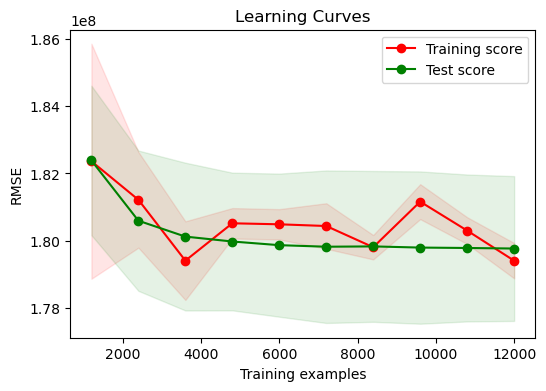

In [53]:
# Plot learning curves

plt.figure()
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('RMSE')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend(loc="best")
plt.show()

The training score is much lower than the test score but the test score decreases and stabilizes, the model might be Overfitting.

#### RandomForest Regressor

In [54]:
rf_model = RandomForestRegressor(random_state=42)

#### Hyperparameter Tuning

In [60]:
param_distributions = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [63]:
#Perforn GridSearch with cross-validation

X_train_subset = X_train.sample(frac=0.1, random_state=42)  # Use 10% of the data
y_train_subset = y_train[X_train_subset.index]

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [64]:
grid_search.fit(X_train_subset, y_train_subset)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [65]:
# Get the best model

best_rf_model = grid_search.best_estimator_

In [73]:
best_rf_model

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      random_state=42)

In [66]:
# Predict on training and testing data

y_train_pred_rf = best_rf_model.predict(X_train)
y_test_pred_rf = best_rf_model.predict(X_test)


In [74]:
y_train_pred_rf

array([28488.82897891, 12900.01945511, 15731.04577404, ...,
       17725.30982984, 14010.14861554, 16992.78152989])

In [75]:
y_test_pred_rf

array([15148.06153765, 21395.97296875, 20103.52508932, ...,
       19876.24758311, 26858.98609701, 16887.64464273])

#### Root Mean Square Percentage error (RMSPE)

In [70]:
def rmspe(y_true,y_pred):
    
    #Avoid division by zero and handle cases with zero values in y_true
    
    nonzero_indices = y_true!=0
    y_true_nonzero = y_true[nonzero_indices]
    y_pred_nonzero = y_pred[nonzero_indices]
    
    #Calculate percentage errors
    
    percentage_errors = (y_true_nonzero - y_pred_nonzero)/y_pred_nonzero
    mean_squared_percentage_error = np.mean(np.square(percentage_errors))
    
    rmspe_value = np.sqrt(mean_squared_percentage_error)
    
    return rmspe_value

In [71]:
# Convert RMSPE to percentage

def rmspe_percentage(y_true, y_pred):
    return rmspe(y_true, y_pred) * 100

In [72]:
# Calculate RMSPE for training and testing data

train_rmspe_percentage_rf = rmspe_percentage(y_train, y_train_pred_rf)
test_rmspe_percentage_rf = rmspe_percentage(y_test, y_test_pred_rf)

print(f"Train RMSPE (Random Forest): {train_rmspe_percentage_rf}%")
print(f"Test RMSPE (Random Forest): {test_rmspe_percentage_rf}%")

Train RMSPE (Random Forest): 75.65713492775988%
Test RMSPE (Random Forest): 77.31413126418386%


#### Model Validation Report:

##### Model : Random Forest Regressor

#### Training Set:

    RMSE: 13,429.14
    R-squared: 0.0014
    RMSPE: 75.66%

#### Test Set:

    RMSE: 13,271.17
    R-squared: -0.0040
    RMSPE: 77.31%

###### The RMSPE on the training set is 75.66%, meaning that, on average, the model's predictions are off by 75.66% from the actual credit card consumption values.

###### The RMSPE on the test set is 77.31%, indicating a similar level of prediction error on unseen data.

### These high RMSPE values suggest that the model's predictions are quite far from the actual values in relative terms, indicating potential issues with the model's accuracy (the model's predictions are significantly inaccurate).